# Data Analysis of the Connecticut Housing Market
This project uses real-world data obtained from [https://www.kaggle.com/datasets/joebeachcapital/house-prices-2001-2020](https://www.kaggle.com/datasets/joebeachcapital/house-prices-2001-2020) listing housing prices in Connecticut between 2001 and 2020. Due to its large size and our need to focus on a particular attribute for data visualization, the only columns used were the list year and sale price attributes.

## Data Breakdown and Visualization
### Imports

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

### Dataset Details

In [85]:
df = pd.read_csv('Sales_01_20.csv')
df.head()

,List Year,Sale Amount
0,2020,325000.0
1,2020,430000.0
2,2020,179900.0
3,2020,890000.0
4,2020,1447500.0


### The Code

In [86]:
# Creates a list of the years from 2001-2020 for the x-axis of the bar graph
years: list[int] = [ year for year in range(2001, 2021) ]


def main(mean_stats: bool=False, std_stats: bool=False, prob_stats: bool=False, show_bar_chart=True):
    # Loads text file
    file_name = 'Sales_01_20.csv'
    # Skips first row
    og_data = np.loadtxt(file_name, delimiter=',', skiprows=1)

    # Ensures that one and only one stat will be displayed
    num_of_stats_selected = sum([mean_stats, std_stats, prob_stats])
    assert num_of_stats_selected != 0, "Please specify at least one statistic to showcase."

    if num_of_stats_selected > 1:
        return calc_multiple_stats(og_data, mean_stats, std_stats, prob_stats)
    elif mean_stats:
        return calc_mean_stats(og_data, show_bar_chart)
    elif std_stats:
        return calc_std_stats(og_data, show_bar_chart)
    elif prob_stats:
        return calc_prob_stats(og_data, show_bar_chart)

def get_linear_regression_vars(X, Y):
    x = np.array(X)
    y = Y
    m, b = np.polyfit(x, y, 1)
    return x, m, b


def generate_chart(stats, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.bar(years, stats)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.plot(years, stats, color="orange", marker="o", linewidth=1)
    x, m, b = get_linear_regression_vars(years, stats)
    plt.plot(years, m * x + b, color="red", label=f"y = {m:.2f}x + {b:.2f}", linestyle="dashed")
    ax.set_xticks([2000, 2005, 2010, 2015, 2020])
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.xticks(rotation=45)
    plt.show()


def generate_table(sale_stats, table_cols, percentile=False):
    if percentile:
        stats = [ f"{stat_from_some_year:.2%}" for stat_from_some_year in sale_stats ]
    else:
        stats = [ f"${stat_from_some_year:,.2f}" for stat_from_some_year in sale_stats ]
    
    column_values = np.array([
        years,
        stats
    ]).T

    df = pd.DataFrame(column_values, columns=table_cols)
    return df


def calc_mean_stats(og_data, show_bar_chart: bool):
    mean_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from that year, calculates the mean, std, and probability of a sale falling between $200K-300K
        mean_from_some_year: float = data_from_some_year[:, 1].mean()

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        mean_sale_stats.append(
            mean_from_some_year
        )

    if show_bar_chart:
        # Figure: Mean Prices
        generate_chart(mean_sale_stats, "Year", "Price", 'Mean Price of Residential Units by Year')
    else:
        return generate_table(mean_sale_stats, ['Year', 'Mean Sales'])

    
def calc_std_stats(og_data, show_bar_chart: bool):
    std_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from that year, calculates the mean, std, and probability of a sale falling between $200K-300K
        std_from_some_year: float = data_from_some_year[:, 1].std()

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        std_sale_stats.append(
            std_from_some_year
        )

    if show_bar_chart:
        # Figure: Standard Deviations
        generate_chart(std_sale_stats, 'Year', 'Standard Deviation (in Millions)', 'Standard Deviation of Residential Units by Year')
    else:
        return generate_table(std_sale_stats, ['Year', 'Standard Deviation of Sales'])

    
def calc_prob_stats(og_data, show_bar_chart: bool):
    prob_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]

        # Using the data from that year, calculates the probability of a sale falling between $200K-300K
        data_in_range_from_some_year = data_from_some_year[(200_000 <= data_from_some_year[:, 1]) &
                                                        (data_from_some_year[:, 1] <= 300_000)]
        prob_from_some_year: float = len(data_in_range_from_some_year) / len(data_from_some_year)

        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        prob_sale_stats.append(
            prob_from_some_year
        )

    if show_bar_chart:
        # Figure: Probabilities
        generate_chart(prob_sale_stats, 'Year', 'Probability ($200K–$300K)', 'Probability of $200K–$300K Prices by Year')
    else:
        return generate_table(prob_sale_stats, ['Year', 'Data Probability of Being Between \$200K and \\$300K'], True)


def calc_multiple_stats(og_data, mean=False, std=False, prob=False):
    mean_sale_stats: list[float] = []
    std_sale_stats: list[float] = []
    prob_sale_stats: list[float] = []
    
    for year in range(2001, 2021):
        # Filters data to retrieve sales from a given year and build a temporary list of the sales from that year
        data_from_some_year = og_data[og_data[:, 0] == year]
        # Using the data from that year, calculates the mean, std, and probability of a sale falling between $200K-300K
        if mean:
            mean_from_some_year: float = data_from_some_year[:, 1].mean()
        if std:
            std_from_some_year: float = data_from_some_year[:, 1].std()
        if prob:
            data_in_range_from_some_year = data_from_some_year[(200_000 <= data_from_some_year[:, 1]) &
                                                               (data_from_some_year[:, 1] <= 300_000)]
            prob_from_some_year: float = len(data_in_range_from_some_year) / len(data_from_some_year)
    
        # Adds those yearly statistics to a list for reference when creating the y-axis of bar graph
        if mean:
            mean_sale_stats.append(mean_from_some_year)
        if std:
            std_sale_stats.append(std_from_some_year)
        if prob:
            prob_sale_stats.append(prob_from_some_year)

    column_values = np.array([
            years,
            [ f"${mean_from_some_year:,.2f}" for mean_from_some_year in mean_sale_stats ],
            [ f"${std_from_some_year:,.2f}" for std_from_some_year in std_sale_stats ],
            [ f"{prob_from_some_year:.2%}" for prob_from_some_year in prob_sale_stats ]
        ]).T
    
    df = pd.DataFrame(column_values, columns=['Year', 'Mean Sales', 'Standard Deviation of Sales', 'Probability of Sale Being Between \$200K and \\$300K'])
    return df


<>:126: SyntaxWarning: invalid escape sequence '\$'
<>:162: SyntaxWarning: invalid escape sequence '\$'
<>:126: SyntaxWarning: invalid escape sequence '\$'
<>:162: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_40615/400297981.py:126: SyntaxWarning: invalid escape sequence '\$'
  return generate_table(prob_sale_stats, ['Year', 'Data Probability of Being Between \$200K and \\$300K'], True)
/tmp/ipykernel_40615/400297981.py:162: SyntaxWarning: invalid escape sequence '\$'
  df = pd.DataFrame(column_values, columns=['Year', 'Mean Sales', 'Standard Deviation of Sales', 'Probability of Sale Being Between \$200K and \\$300K'])


### Mean

#### Bar Chart

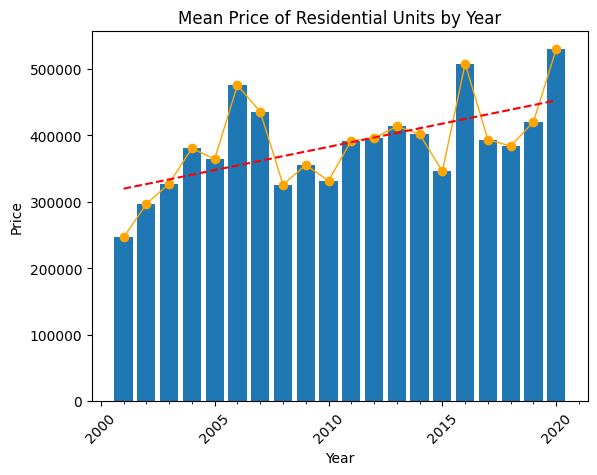

In [87]:
main(mean_stats=True, show_bar_chart=True)

#### Table

In [88]:
df = main(mean_stats=True, show_bar_chart=False)
df

,Year,Mean Sales
0,2001,"$246,235.04"
1,2002,"$296,357.12"
2,2003,"$327,217.93"
3,2004,"$380,297.01"
4,2005,"$364,030.13"
5,2006,"$475,379.23"
6,2007,"$435,713.38"
7,2008,"$325,831.79"
8,2009,"$355,250.33"
9,2010,"$331,657.47"


#### Observations
- The average market price for housing has been increasing ${\textemdash}$ doubling from \$250K in 2001 to \\$500K in 2020.

### Standard Deviation
#### Bar Chart

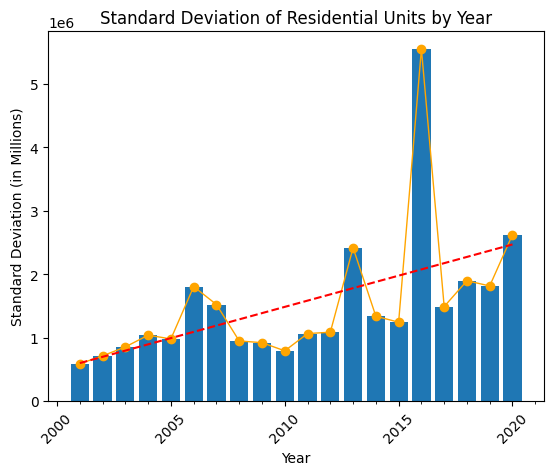

In [89]:
main(std_stats=True, show_bar_chart=True)

#### Table

In [90]:
df = main(std_stats=True, show_bar_chart=False)
df

,Year,Standard Deviation of Sales
0,2001,"$587,961.37"
1,2002,"$711,353.42"
2,2003,"$852,406.39"
3,2004,"$1,037,222.84"
4,2005,"$978,403.13"
5,2006,"$1,803,537.63"
6,2007,"$1,520,524.36"
7,2008,"$946,576.04"
8,2009,"$919,126.62"
9,2010,"$790,797.63"


#### Observations
- The distribution of sale prices has expanded over time.
    - Most notable is 2016, which experiences a massive spike.
- From 2001 onward, we can observe the general trend wherein the standard deviation of sales increases. This is highlighted by the standard deviation of sales being at its lowest in 2001 with about \$600K, and at its highest in 2016 with \\$5.5M. This indicates that a housing market that is becoming more and more unpredictable and unstable.
- This implies that the housing market is becoming more unpredictable and prone to change. In turn, as price swings grow larger, consumers may find a bargain in one period and be faced with exorbitant prices in another.
### Probability
#### Bar Chart

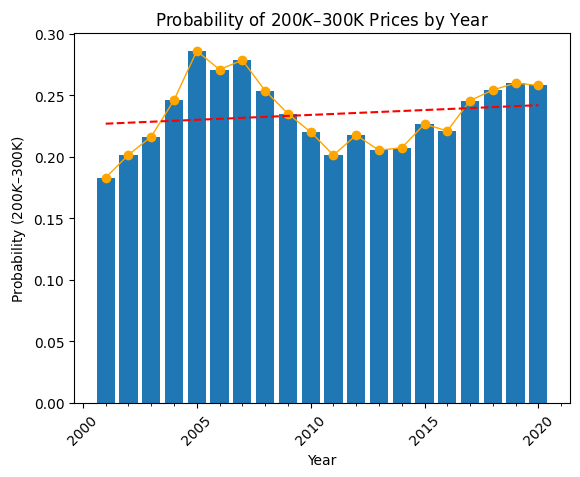

In [91]:
main(prob_stats=True, show_bar_chart=True)

#### Table

In [92]:
df = main(prob_stats=True, show_bar_chart=False)
df

,Year,Data Probability of Being Between \$200K and \$300K
0,2001,18.31%
1,2002,20.17%
2,2003,21.64%
3,2004,24.61%
4,2005,28.60%
5,2006,27.10%
6,2007,27.86%
7,2008,25.38%
8,2009,23.52%
9,2010,22.02%


#### Observations

&emsp;&emsp;Looking at the bar chart, we can see that the market has experienced multiple periods of increased and decreased pricing of houses between \$200K-\\$300K. But based on the bigger picture illustrated by the linear regression line, the overall trend over the years has been subtle shift towards housing prices in this range.

### Summary Table

In [93]:
df = main(mean_stats=True, std_stats=True, prob_stats=True)
df

,Year,Mean Sales,Standard Deviation of Sales,Probability of Sale Being Between \$200K and \$300K
0,2001,"$246,235.04","$587,961.37",18.31%
1,2002,"$296,357.12","$711,353.42",20.17%
2,2003,"$327,217.93","$852,406.39",21.64%
3,2004,"$380,297.01","$1,037,222.84",24.61%
4,2005,"$364,030.13","$978,403.13",28.60%
5,2006,"$475,379.23","$1,803,537.63",27.10%
6,2007,"$435,713.38","$1,520,524.36",27.86%
7,2008,"$325,831.79","$946,576.04",25.38%
8,2009,"$355,250.33","$919,126.62",23.52%
9,2010,"$331,657.47","$790,797.63",22.02%


## Conclusion

&emsp;&emsp;
